<Figure size 1500x1000 with 0 Axes>

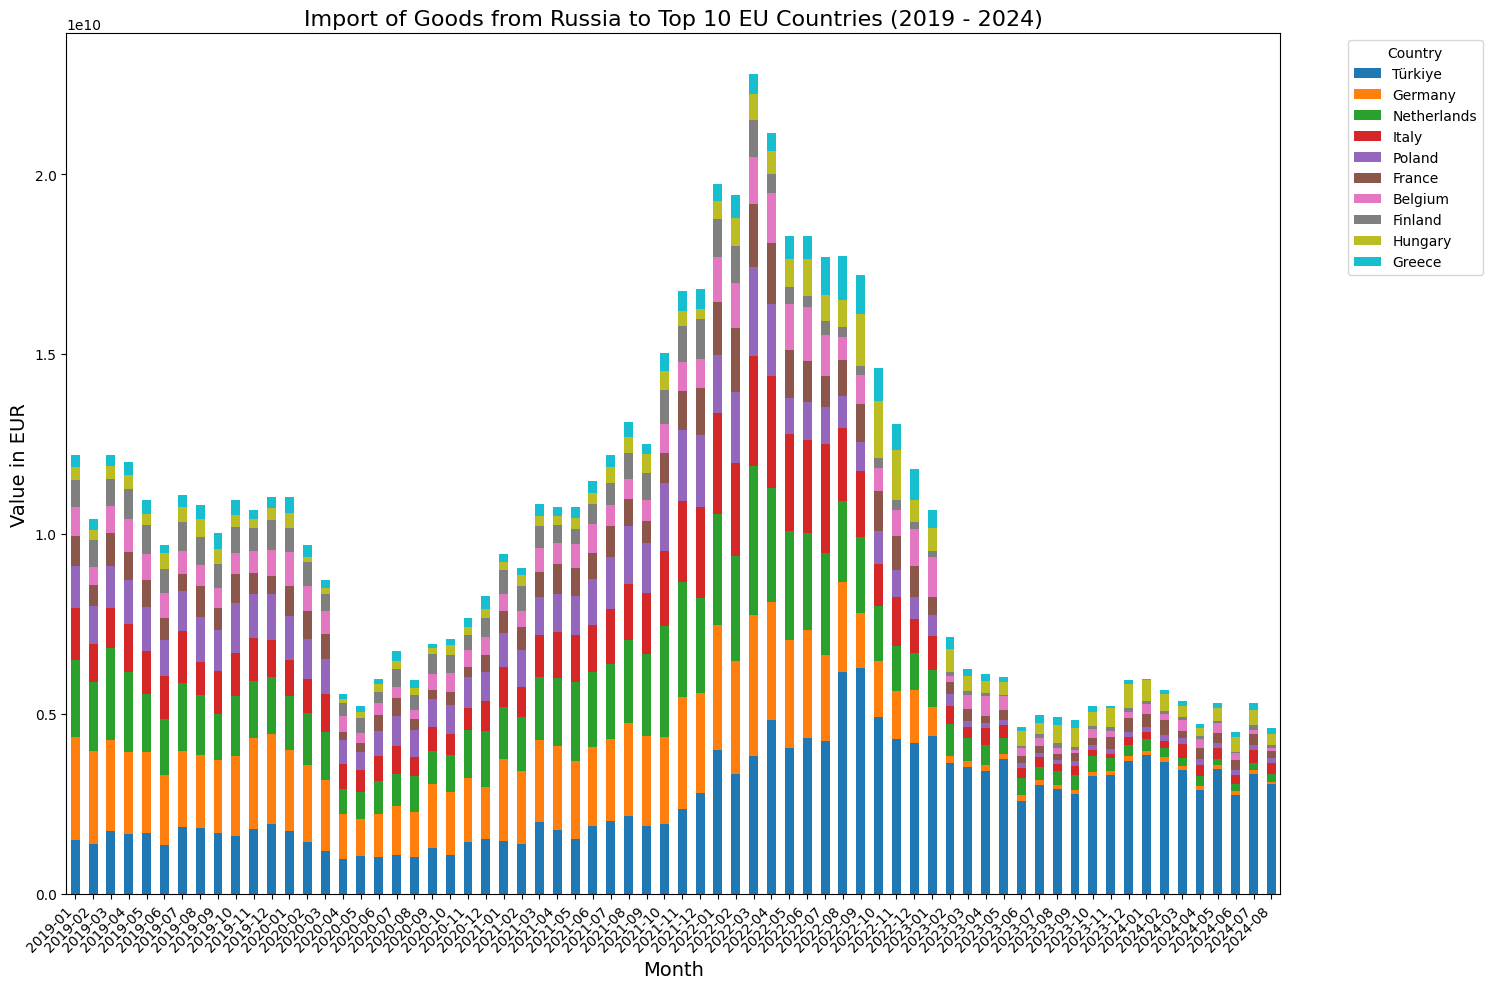

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define the folder path where the CSV files are stored
folder_path = 'data/russia_import_eurostat'

# Create an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Loop through all CSV files in the folder and append them to the combined DataFrame
for file in glob.glob(os.path.join(folder_path, '*.csv')):
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Filter the necessary columns for visualization
combined_df_filtered = combined_df[['REPORTER', 'PERIOD', 'VALUE_EUR']]

# Remove rows where 'REPORTER' contains 'Euro area' or 'European Union'
combined_df_filtered = combined_df_filtered[~combined_df_filtered['REPORTER'].str.contains('Euro area|European Union')]

# Keep only the first word of the 'REPORTER' column
combined_df_filtered['REPORTER'] = combined_df_filtered['REPORTER'].str.split().str[0]

# Convert the 'PERIOD' column to datetime format for proper sorting
combined_df_filtered['PERIOD'] = pd.to_datetime(combined_df_filtered['PERIOD'], format='%b. %Y')

# Format 'PERIOD' to show only year and month
combined_df_filtered['PERIOD'] = combined_df_filtered['PERIOD'].dt.strftime('%Y-%m')

# Sort the data by 'PERIOD'
combined_df_filtered = combined_df_filtered.sort_values(by='PERIOD')

# Group data by 'REPORTER' and 'PERIOD' and sum the values
grouped_df = combined_df_filtered.groupby(['REPORTER', 'PERIOD'])['VALUE_EUR'].sum().reset_index()

# Get the top 10 partners by total value
top_partners = grouped_df.groupby('REPORTER')['VALUE_EUR'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 partners
top_10_df = grouped_df[grouped_df['REPORTER'].isin(top_partners)]

# Pivot the data to get 'PERIOD' as index and each 'REPORTER' as a separate column with 'VALUE_EUR' as values
df_pivot = top_10_df.pivot_table(index='PERIOD', columns='REPORTER', values='VALUE_EUR', aggfunc='sum', fill_value=0)

# Sort the columns by total value across all periods for ordering in the legend
total_values = df_pivot.sum().sort_values(ascending=False)
df_pivot = df_pivot[total_values.index]

# Plotting the stacked bar chart to visualize import data by month
plt.figure(figsize=(15, 10))

# Plotting the data as a stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(15, 10))

# Setting title and labels
plt.title('Import of Goods from Russia to Top 10 EU Countries (2019 - 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value in EUR', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', labels=total_values.index)

# Display the plot
plt.tight_layout()
plt.show()


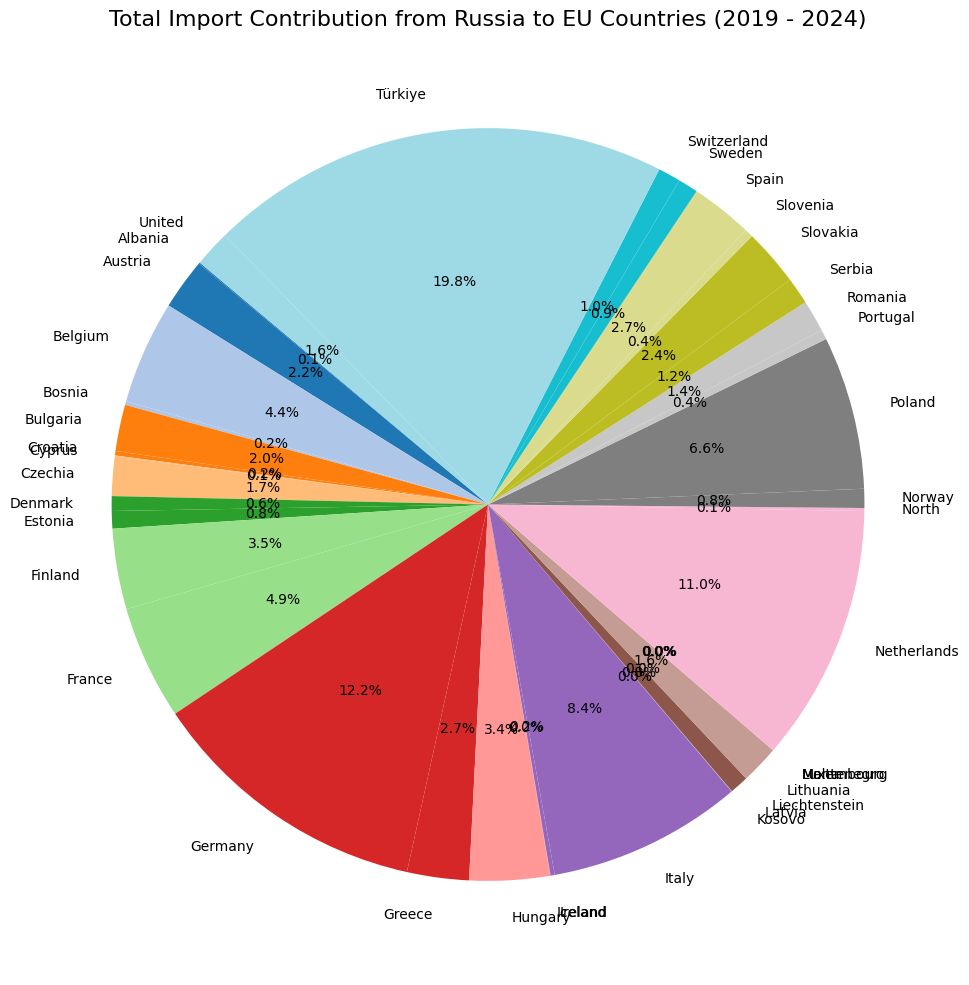

In [4]:
import seaborn as sns

# Aggregate the data by 'REPORTER' to calculate total imports from each country
total_imports_by_country = combined_df_filtered.groupby('REPORTER')['VALUE_EUR'].sum()

# Plotting the pie chart to visualize total import contribution by each country
plt.figure(figsize=(10, 10))

# Plotting the pie chart
total_imports_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')

# Setting title
plt.title('Total Import Contribution from Russia to EU Countries (2019 - 2024)', fontsize=16)
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

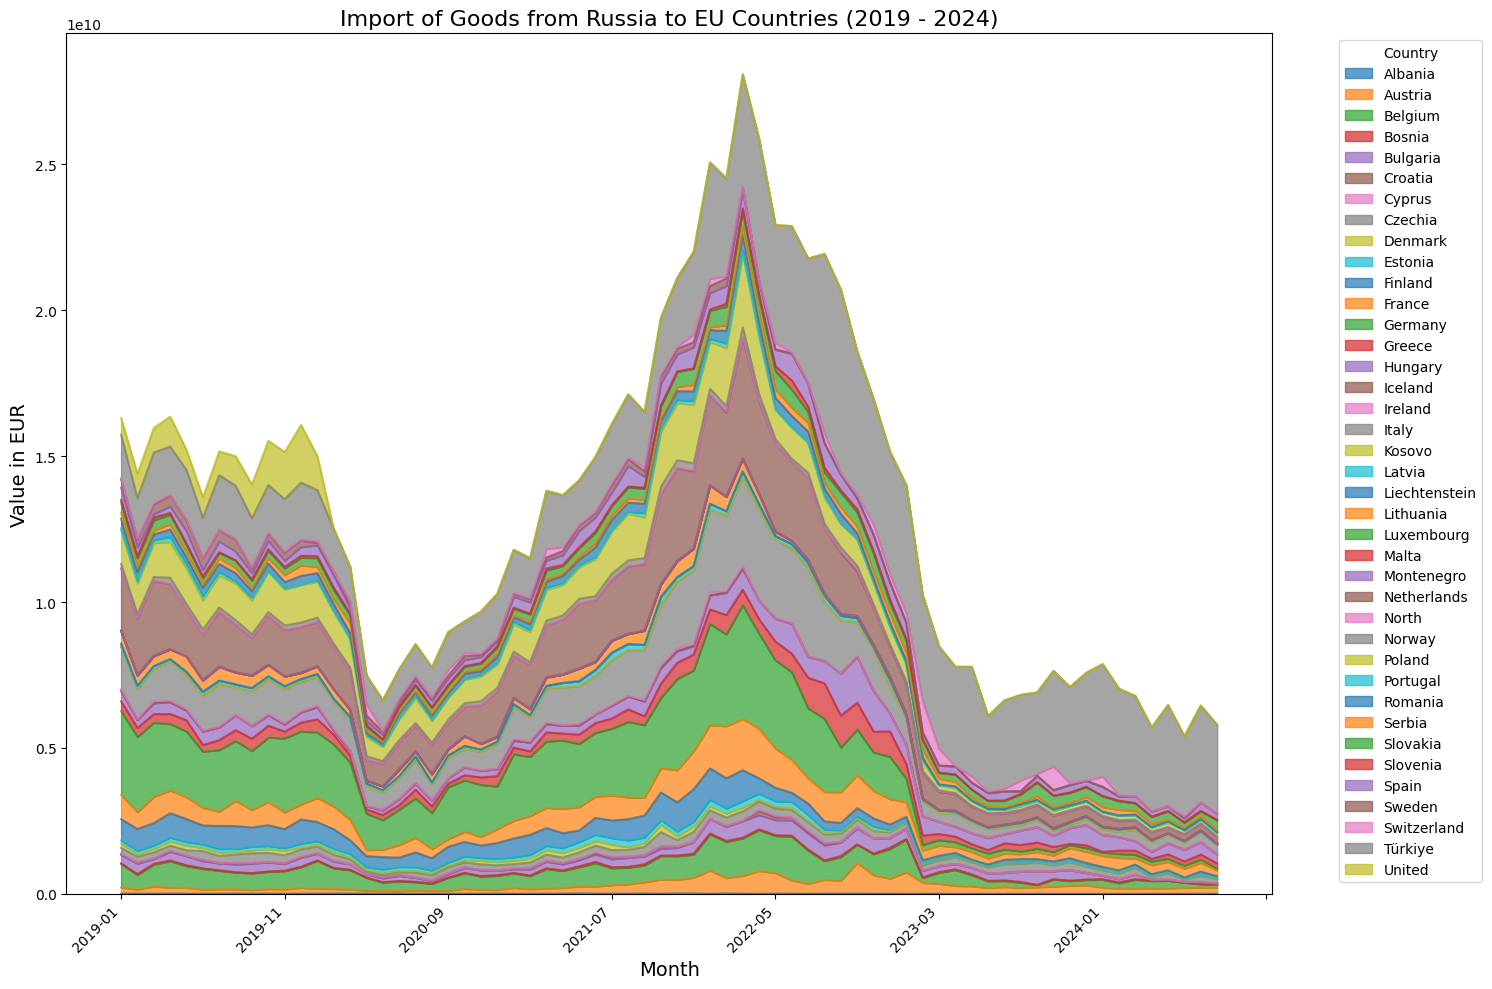

In [5]:

# Pivot the data to get 'PERIOD' as index and each 'REPORTER' as a separate column with 'VALUE_IN_EUR' as values
df_pivot = combined_df_filtered.pivot_table(index='PERIOD', columns='REPORTER', values='VALUE_EUR', aggfunc='sum', fill_value=0)

# Plotting the area chart to visualize import data by month
plt.figure(figsize=(15, 10))

# Plotting the data as an area chart
df_pivot.plot(kind='area', stacked=True, figsize=(15, 10), alpha=0.7)

# Setting title and labels
plt.title('Import of Goods from Russia to EU Countries (2019 - 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value in EUR', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

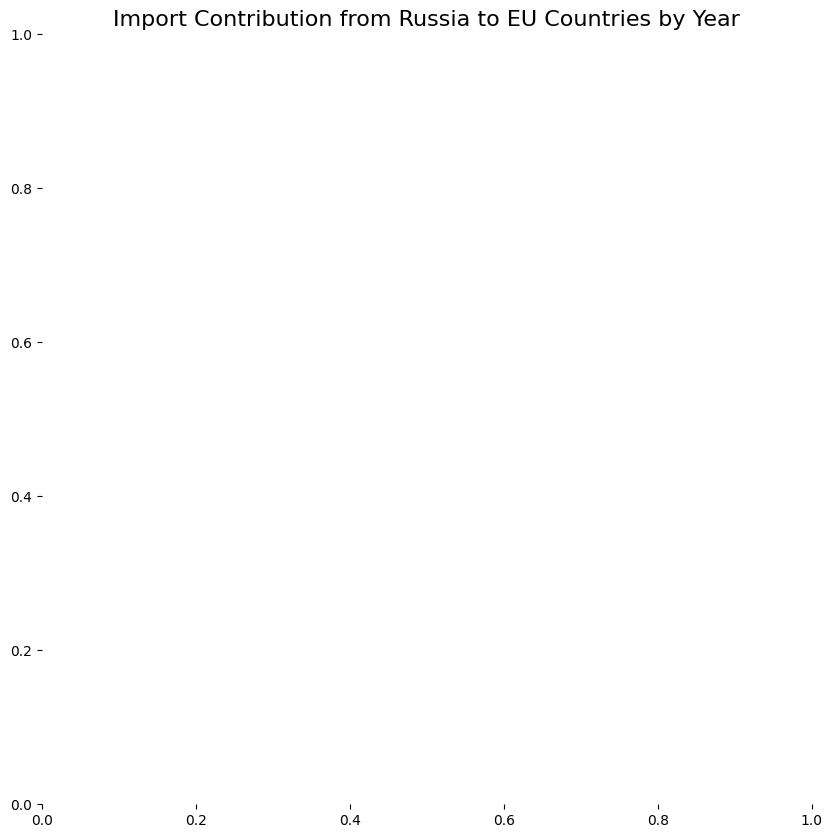

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import matplotlib.animation as animation
from IPython.display import HTML
import squarify

# Filter the necessary columns for visualization
combined_df_filtered = combined_df[['REPORTER', 'PERIOD', 'VALUE_EUR']]

# Remove rows where 'REPORTER' contains 'Euro area' or 'European Union'
combined_df_filtered = combined_df_filtered[~combined_df_filtered['REPORTER'].str.contains('Euro area|European Union')]

# Keep only the first word of the 'REPORTER' column
combined_df_filtered['REPORTER'] = combined_df_filtered['REPORTER'].str.split().str[0]

# Convert the 'PERIOD' column to datetime format for proper sorting
combined_df_filtered['PERIOD'] = pd.to_datetime(combined_df_filtered['PERIOD'], format='%b. %Y')

# Format 'PERIOD' to show only year
combined_df_filtered['PERIOD'] = combined_df_filtered['PERIOD'].dt.strftime('%Y')

# Sort the data by 'PERIOD'
combined_df_filtered = combined_df_filtered.sort_values(by='PERIOD')

# Aggregate the data by 'REPORTER' and 'PERIOD' to calculate yearly imports from each country
yearly_imports = combined_df_filtered.groupby(['PERIOD', 'REPORTER'])['VALUE_EUR'].sum().unstack(fill_value=0)

# Plotting an animated pie chart to show import contribution changes by year
fig, ax = plt.subplots(figsize=(10, 10))

# Function to initialize the pie chart
def init():
    ax.clear()
    ax.set_title('Import Contribution from Russia to EU Countries by Year', fontsize=16)

# Function to update the pie chart for each year
def update(year):
    ax.clear()
    data = yearly_imports.loc[year]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    ax.set_title(f'Import Contribution to Russia from EU Countries in {year}', fontsize=16)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=yearly_imports.index, init_func=init, repeat=False)

# Display the animation
HTML(ani.to_jshtml())


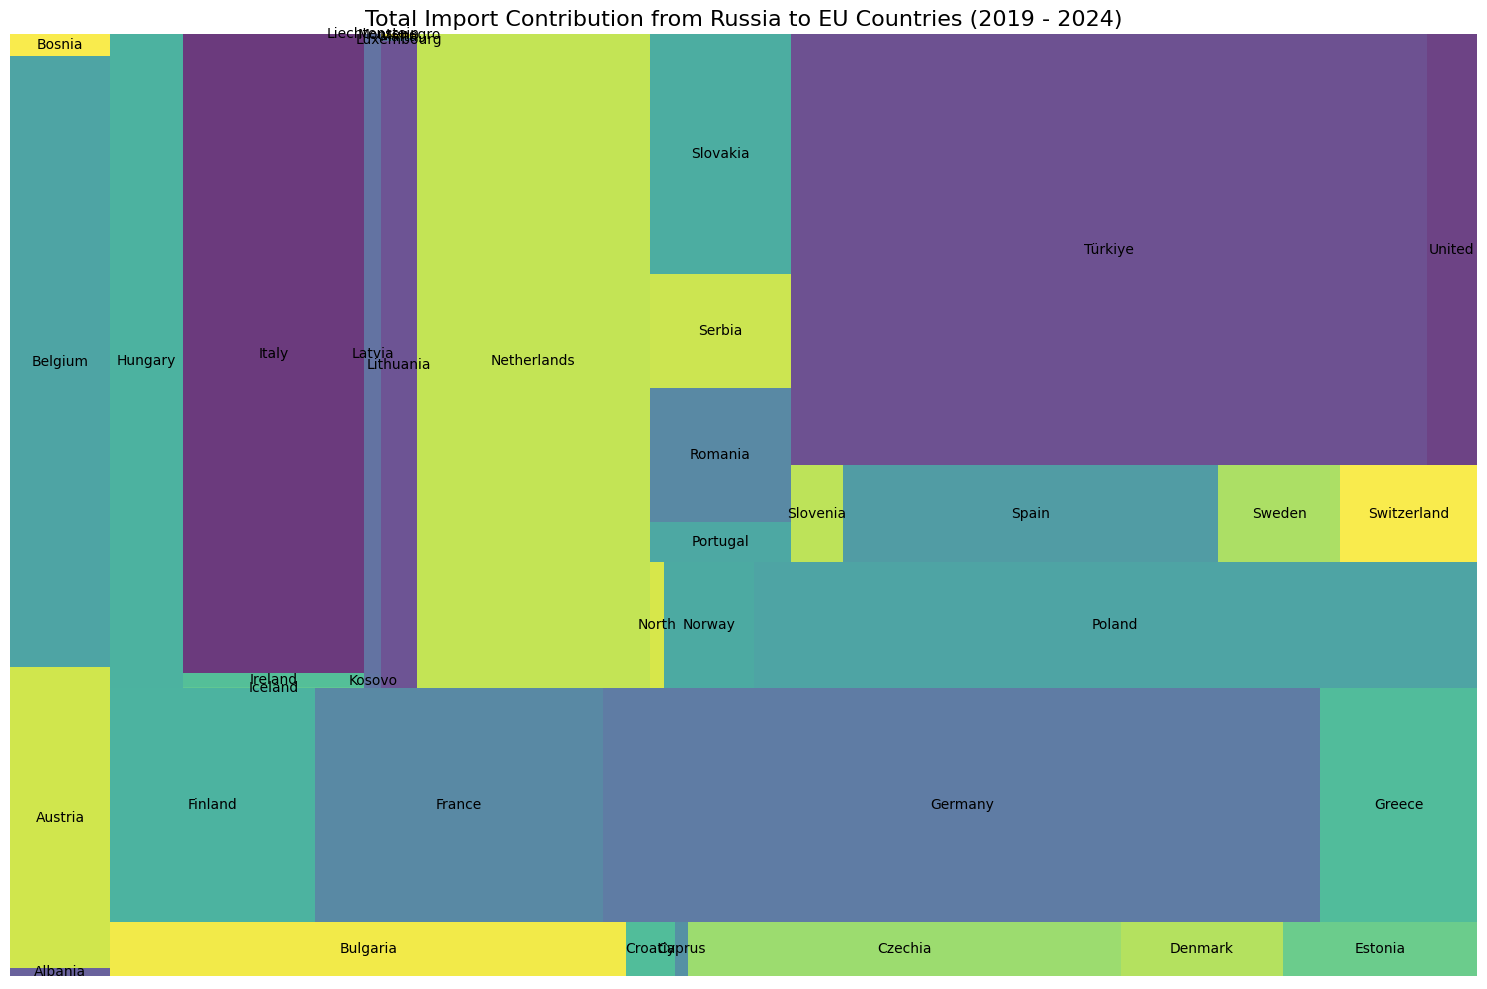

In [7]:
import matplotlib.animation as animation
from IPython.display import HTML
import squarify

# Aggregate the data by 'REPORTER' to calculate total imports from each country
total_imports_by_country = combined_df_filtered.groupby('REPORTER')['VALUE_EUR'].sum()

# Plotting the treemap to visualize total import contribution by each country
plt.figure(figsize=(15, 10))

# Using squarify to create the treemap
squarify.plot(sizes=total_imports_by_country.values, label=total_imports_by_country.index, alpha=0.8)

# Setting title
plt.title('Total Import Contribution from Russia to EU Countries (2019 - 2024)', fontsize=16)
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


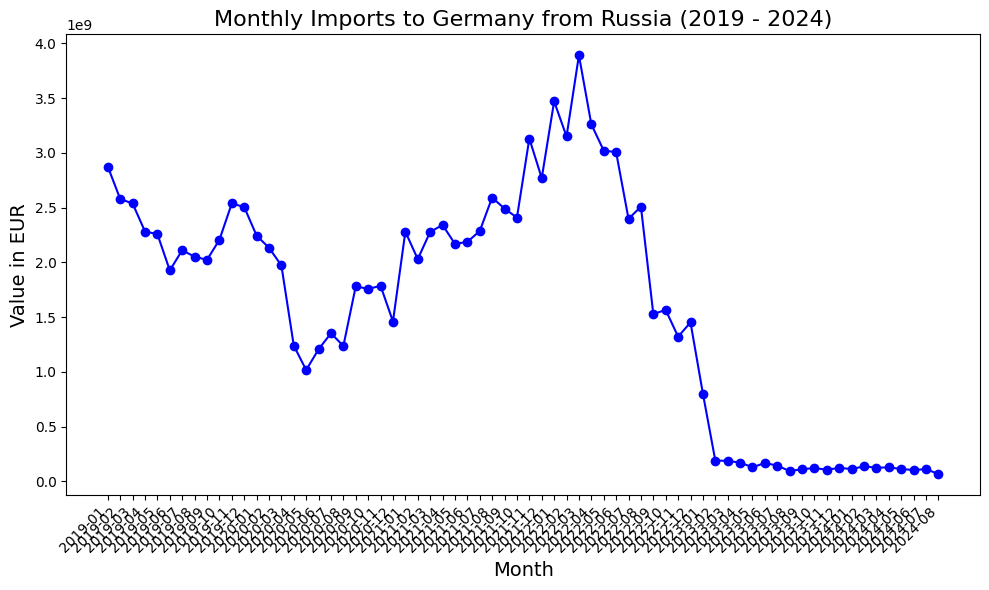

In [8]:
country = 'Germany'
# Filter the necessary columns for visualization
combined_df_filtered = combined_df[['REPORTER', 'PERIOD', 'VALUE_EUR']]

# Remove rows where 'REPORTER' contains 'Euro area' or 'European Union'
combined_df_filtered = combined_df_filtered[~combined_df_filtered['REPORTER'].str.contains('Euro area|European Union')]

# Keep only the first word of the 'REPORTER' column
combined_df_filtered['REPORTER'] = combined_df_filtered['REPORTER'].str.split().str[0]

# Convert the 'PERIOD' column to datetime format for proper sorting
combined_df_filtered['PERIOD'] = pd.to_datetime(combined_df_filtered['PERIOD'], format='%b. %Y')

# Format 'PERIOD' to show only year and month
combined_df_filtered['PERIOD'] = combined_df_filtered['PERIOD'].dt.strftime('%Y-%m')

# Sort the data by 'PERIOD'
combined_df_filtered = combined_df_filtered.sort_values(by='PERIOD')

# Filter data for Germany
germany_imports = combined_df_filtered[combined_df_filtered['REPORTER'].str.contains(country)]

# Plotting a line chart to show changes in Germany's import to Kyrgyzstan by month
plt.figure(figsize=(10, 6))

plt.plot(germany_imports['PERIOD'], germany_imports['VALUE_EUR'], marker='o', linestyle='-', color='b')

# Setting title and labels
plt.title(f'Monthly Imports to {country} from Russia (2019 - 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value in EUR', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
germany_imports[:20]

,REPORTER,PERIOD,VALUE_EUR
672,Germany,2019-01,2874191660
1392,Germany,2019-02,2578107106
2750,Germany,2019-03,2537628315
2324,Germany,2019-04,2281591107
458,Germany,2019-05,2257753323
1733,Germany,2019-06,1926869066
163,Germany,2019-07,2110816959
374,Germany,2019-08,2051698768
289,Germany,2019-09,2022741175
1180,Germany,2019-10,2205320399


In [10]:
germany_imports[20:40]

,REPORTER,PERIOD,VALUE_EUR
756,Germany,2020-09,1781928066
1561,Germany,2020-10,1757179379
1944,Germany,2020-11,1786118777
881,Germany,2020-12,1460069345
586,Germany,2021-01,2279981940
2622,Germany,2021-02,2029693982
1690,Germany,2021-03,2277481510
2494,Germany,2021-04,2341938359
2450,Germany,2021-05,2168647780
2708,Germany,2021-06,2186921487


In [11]:
germany_imports[40:]

,REPORTER,PERIOD,VALUE_EUR
244,Germany,2022-05,3020223099
1603,Germany,2022-06,3006390892
1134,Germany,2022-07,2396907784
797,Germany,2022-08,2508772763
1092,Germany,2022-09,1528760323
2026,Germany,2022-10,1565250718
1899,Germany,2022-11,1321908116
1010,Germany,2022-12,1451804740
1049,Germany,2023-01,801314931
1209,Germany,2023-02,191127796
